
# CEWA 568 Snow Hydrology - Spring 2023
## Lab 4-1-short: Downloading and plotting snow flux and wind speed data at Kettle Ponds

Written by Eli Schwat (elilouis@uw.edu) - April 2023
shortened by Jessica Lundquist

---

## Library imports

In [1]:
# import libraries we'll need
import urllib
import pandas as pd
import datetime as dt
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib inline

## User-provided inputs

Here we define a few variables to be used in the notebook. You may or may not want to change these values.

In [2]:
# Provide the path to a directory you want to download the SoS files to
download_directory = "../data/sosnoqc"

# Provide the paths to the precipitation file. This file was provided to you, you can either
# specify the path below or put the file in the same directory as this notebook.
precipitation_file = 'precipitation.nc'
windflux_file = 'sos_wind_snowflux.nc'

# Provide a the start and end dates you want to download
start_date = '20221201'
end_date = '20230327'

# Provide the specific variables you want to extract from the dataset.
# We provide these in advance because the datasets are very large and, 
# when we open them, we want to immediately extract only the data we want.
VARIABLES = [
    'spd_1m_ue',
    'spd_3m_ue',
    'spd_10m_ue',
    'SF_avg_1m_ue',
    'SF_avg_2m_ue'
]

## Load and open SoS Data

Note that the longer version of this lab walks you through downloading this data.  We will presume that you have downloaded it from the webpage and placed it in this working directory.

In [3]:
sos_dataset_60min=xr.open_dataset("sos_wind_snowflux.nc")

In [4]:
# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_date, '%Y%m%d'),
    dt.datetime.strptime(end_date, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

#### Check out our SoS dataset

Note that our `dataset` has just the variables we are defined. Note that `example_complete_dataset` has 1047 variables.

In [5]:
sos_dataset_60min

<xarray.Dataset>
Dimensions:       (time: 2808)
Coordinates:
  * time          (time) datetime64[ns] 2022-12-01 ... 2023-03-27T23:00:00
Data variables:
    spd_1m_ue     (time) float32 ...
    spd_3m_ue     (time) float32 ...
    spd_10m_ue    (time) float32 ...
    SF_avg_1m_ue  (time) float32 ...
    SF_avg_2m_ue  (time) float32 ...

## Plot
We use the Matplotlib library because integrates nicely with Xarray and makes creating simple plots quickly an easy task.

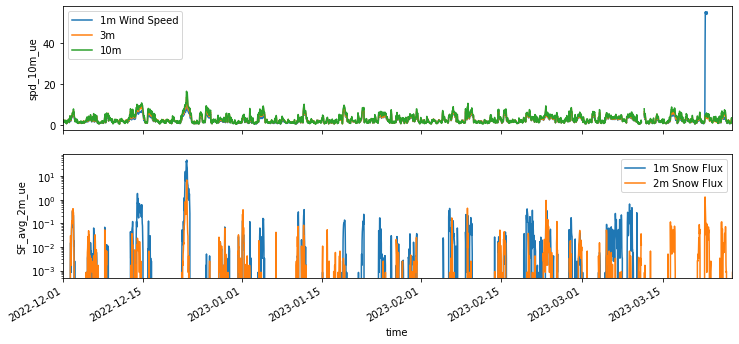

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(12,5), sharex=True)
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[0], label='1m Wind Speed')
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[0], label='3m')
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[0], label='10m')
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[1], label='1m Snow Flux')
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[1], label='2m Snow Flux')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel("")
axes[1].set_yscale("log")
axes[0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2023,3,27))
plt.show()

Note the probably-not-real measurement towards the end of our time series. We can filter and interpolate outliers to rmeove this datapoint

In [7]:
def filter_outliers(data, perc=0.99):
  # calculate percentile 
  threshold = data.quantile(perc)
  # find outliers and replace them with max among remaining values 
  mask = data.where(abs(data) <= threshold)
  # max_value = mask.max().values
  # .where replace outliers with nan
  # mask = mask.fillna(max_value)
  data = mask
  return data

sos_dataset_60min['spd_1m_ue'] = filter_outliers(sos_dataset_60min['spd_1m_ue']).interp()

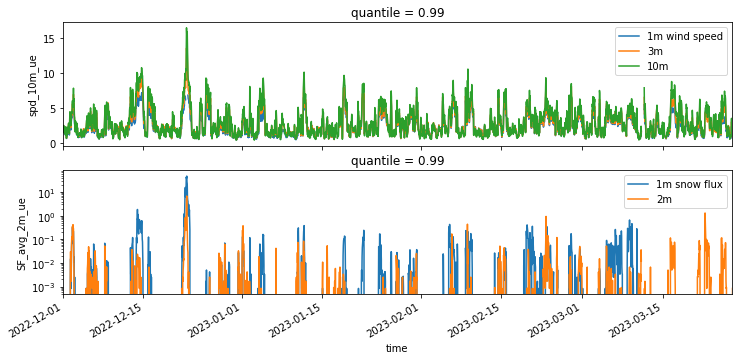

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(12,5), sharex=True)
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[0], label='1m wind speed')
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[0], label='3m')
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[0], label='10m')
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[1], label='1m snow flux')
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[1], label='2m')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel("")
axes[1].set_yscale("log")
axes[0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2023,3,27))
plt.show()